In [1]:
#Let us extract the data from out input images that is stored in the form of pixels and perform PCA analysis on the data to achieve the optimal component size to build our SVM model using the elbow method.

In [2]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.decomposition import PCA

In [3]:
import pickle

In [5]:
#Load the input data
data = pickle.load(open('./data/data_image_100x100.pickle',mode='rb'))

In [6]:
#Now we need to perform PCA and find the eigen face, this is done in 3 steps:
#Normalize the data -> Subtract the mean of the pixels from the data -> Perform PCA

In [7]:
X = data.drop('gender',axis=1).values

In [9]:
#Find the mean
mean_face = X.mean(axis=0)

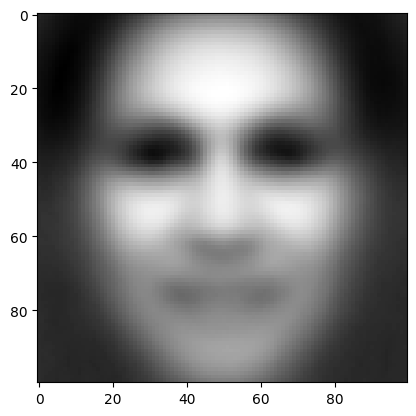

In [10]:
#Visualize the mean face
plt.imshow(mean_face.reshape(100,100),cmap='gray')
plt.show()

In [11]:
#Subtracting the mean face 
X_actual = X - mean_face

In [12]:
#Perform PCA
pca = PCA(n_components=None,svd_solver='auto',whiten=True)

In [13]:
pca.fit(X_actual)

PCA(whiten=True)

In [14]:
#Now to perform the elbow method, we create a DF that stores the following values:
#Variance Ratio
#Variance Ratio Sum
#PCA components
exp_variance_df = pd.DataFrame()
exp_variance_df['explained_variance_ratio'] = pca.explained_variance_ratio_
exp_variance_df['explained_variance_ratio_cum'] = exp_variance_df['explained_variance_ratio'].cumsum()
exp_variance_df['principle_components'] = np.arange(1,len(exp_variance_df)+1) 


In [15]:
exp_variance_df

,explained_variance_ratio,explained_variance_ratio_cum,principle_components
0,2.518844e-01,0.251884,1
1,1.156411e-01,0.367526,2
2,1.039699e-01,0.471495,3
3,5.216143e-02,0.523657,4
4,3.300781e-02,0.556665,5
...,...,...,...
4547,3.026833e-36,1.000000,4548
4548,1.965343e-36,1.000000,4549
4549,1.464330e-36,1.000000,4550
4550,1.249536e-36,1.000000,4551


In [16]:
#Let us build the elbow method to find the optimal PCA
exp_variance_df.set_index(exp_variance_df['principle_components'],inplace=True)

<Axes: xlabel='principle_components'>

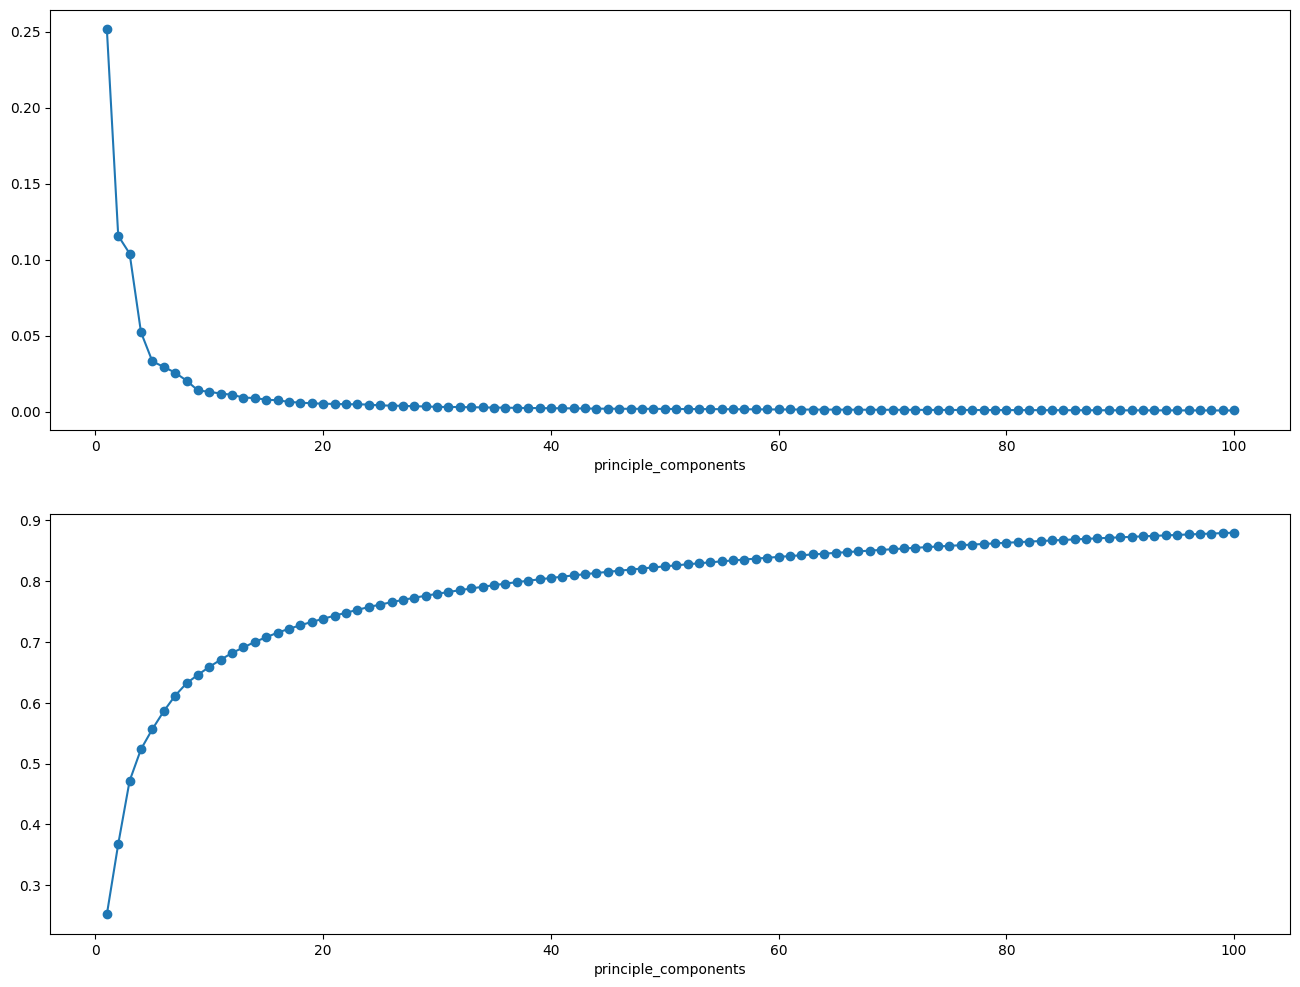

In [17]:
#Visualize the pca explained variance
fig,ax = plt.subplots(nrows=2,figsize=(16,12))

exp_variance_df['explained_variance_ratio'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_variance_df['explained_variance_ratio_cum'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [18]:
# Looking at the ELBOW METHOD, we chose number of pca components as 50 - as it has more than 80% variation

In [19]:
#Next step is to save the PCA model and use it as an input for our SVM model.